## Data Loading and Preprocessing

In [27]:
import pandas as pd
from sklearn.utils import shuffle
df = pd.read_csv('resources/dataset_kaggle.csv')
df = shuffle(df, random_state=42)
df.head()

,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,Symptom_9,Symptom_10,Symptom_11,Symptom_12,Symptom_13,Symptom_14,Symptom_15,Symptom_16,Symptom_17
209,Heart Disease,Blood in stool,Bowel issues,Nausea,Constipation,Jaw pain,Fatigue,Itching,Irregular heartbeat,Diarrhea,Bloating,Swelling,Weakness,Difficulty swallowing,Numbness,Shortness of breath,Thickened skin,Gas
280,Rheumatoid Arthritis,Unexplained bleeding,Bowel issues,Stooped posture,Burning,Nausea,Nosebleeds,Increased mucus production,Vomiting,Chest discomfort,Diarrhea,Loss of height,Swelling,Itching,Tenderness,Bloating,Irritability,Shortness of breath
33,Bronchitis,Bowel issues,Soreness,Throbbing pain,Nosebleeds,Increased mucus production,Frequent urination,Chest discomfort,Slight fever,Vomiting,Swelling,Mucus production,Bone pain,Blisters,Shortness of breath,Anemia,Sore that doesn’t heal,Gas
210,Gout,Redness,Blood in stool,Inability to defecate,Bleeding mole,Nausea,Rapid pulse,Increased mucus production,Hard lumps,Constipation,Vomiting,Slight fever,Diarrhea,Bloating,Swelling,Tophi,Shortness of breath,Hunger
93,Bronchitis,Pneumonia,Nosebleeds,Hard lumps,Increased mucus production,Increased thirst,Belching,Chest discomfort,Vomiting,Diarrhea,Bloating,Bone fractures,Swelling,Tenderness,Irritability,Numbness,Shortness of breath,Sore that doesn’t heal


In [28]:
for col in df.columns[1:]:
    df[col] = df[col].str.replace('_', ' ')
df = df.apply(lambda x: x.str.strip() if x.dtype == "object" else x)
df = df.fillna(0)
df.head()

,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,Symptom_9,Symptom_10,Symptom_11,Symptom_12,Symptom_13,Symptom_14,Symptom_15,Symptom_16,Symptom_17
209,Heart Disease,Blood in stool,Bowel issues,Nausea,Constipation,Jaw pain,Fatigue,Itching,Irregular heartbeat,Diarrhea,Bloating,Swelling,Weakness,Difficulty swallowing,Numbness,Shortness of breath,Thickened skin,Gas
280,Rheumatoid Arthritis,Unexplained bleeding,Bowel issues,Stooped posture,Burning,Nausea,Nosebleeds,Increased mucus production,Vomiting,Chest discomfort,Diarrhea,Loss of height,Swelling,Itching,Tenderness,Bloating,Irritability,Shortness of breath
33,Bronchitis,Bowel issues,Soreness,Throbbing pain,Nosebleeds,Increased mucus production,Frequent urination,Chest discomfort,Slight fever,Vomiting,Swelling,Mucus production,Bone pain,Blisters,Shortness of breath,Anemia,Sore that doesn’t heal,Gas
210,Gout,Redness,Blood in stool,Inability to defecate,Bleeding mole,Nausea,Rapid pulse,Increased mucus production,Hard lumps,Constipation,Vomiting,Slight fever,Diarrhea,Bloating,Swelling,Tophi,Shortness of breath,Hunger
93,Bronchitis,Pneumonia,Nosebleeds,Hard lumps,Increased mucus production,Increased thirst,Belching,Chest discomfort,Vomiting,Diarrhea,Bloating,Bone fractures,Swelling,Tenderness,Irritability,Numbness,Shortness of breath,Sore that doesn’t heal


In [29]:
df.shape

(400, 18)

## Exploratory Data Analysis (EDA)

In [30]:
import matplotlib.pyplot as plt

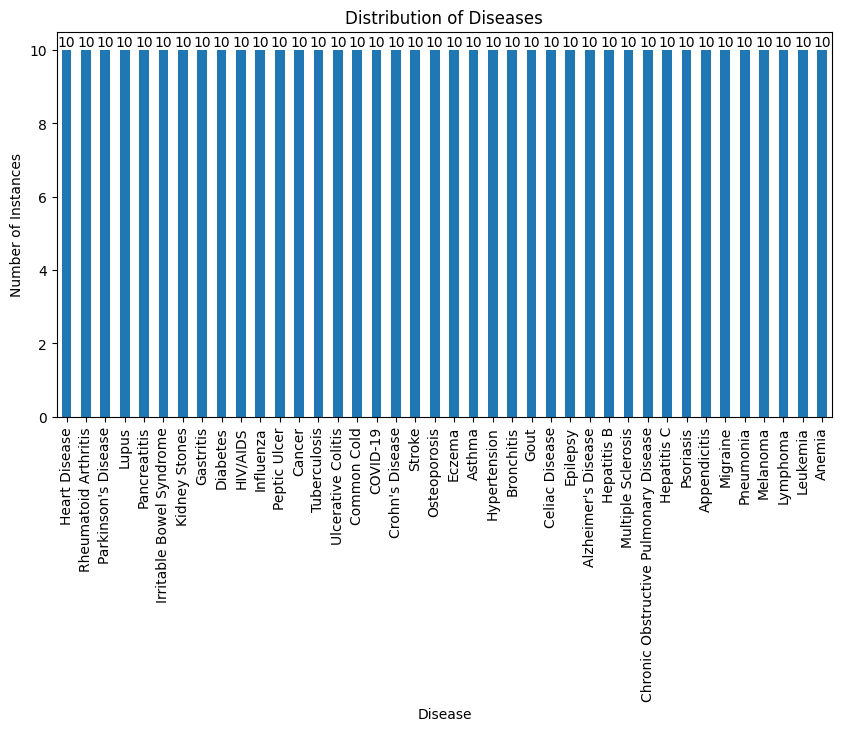

In [31]:
disease_distribution = df['Disease'].value_counts()

plt.figure(figsize=(10, 5))
disease_distribution.plot(kind='bar')
plt.title("Distribution of Diseases")
plt.xlabel("Disease")
plt.ylabel("Number of Instances")

for index, value in enumerate(disease_distribution):
    plt.text(index, value + 0.1, str(value), ha='center')

plt.show()

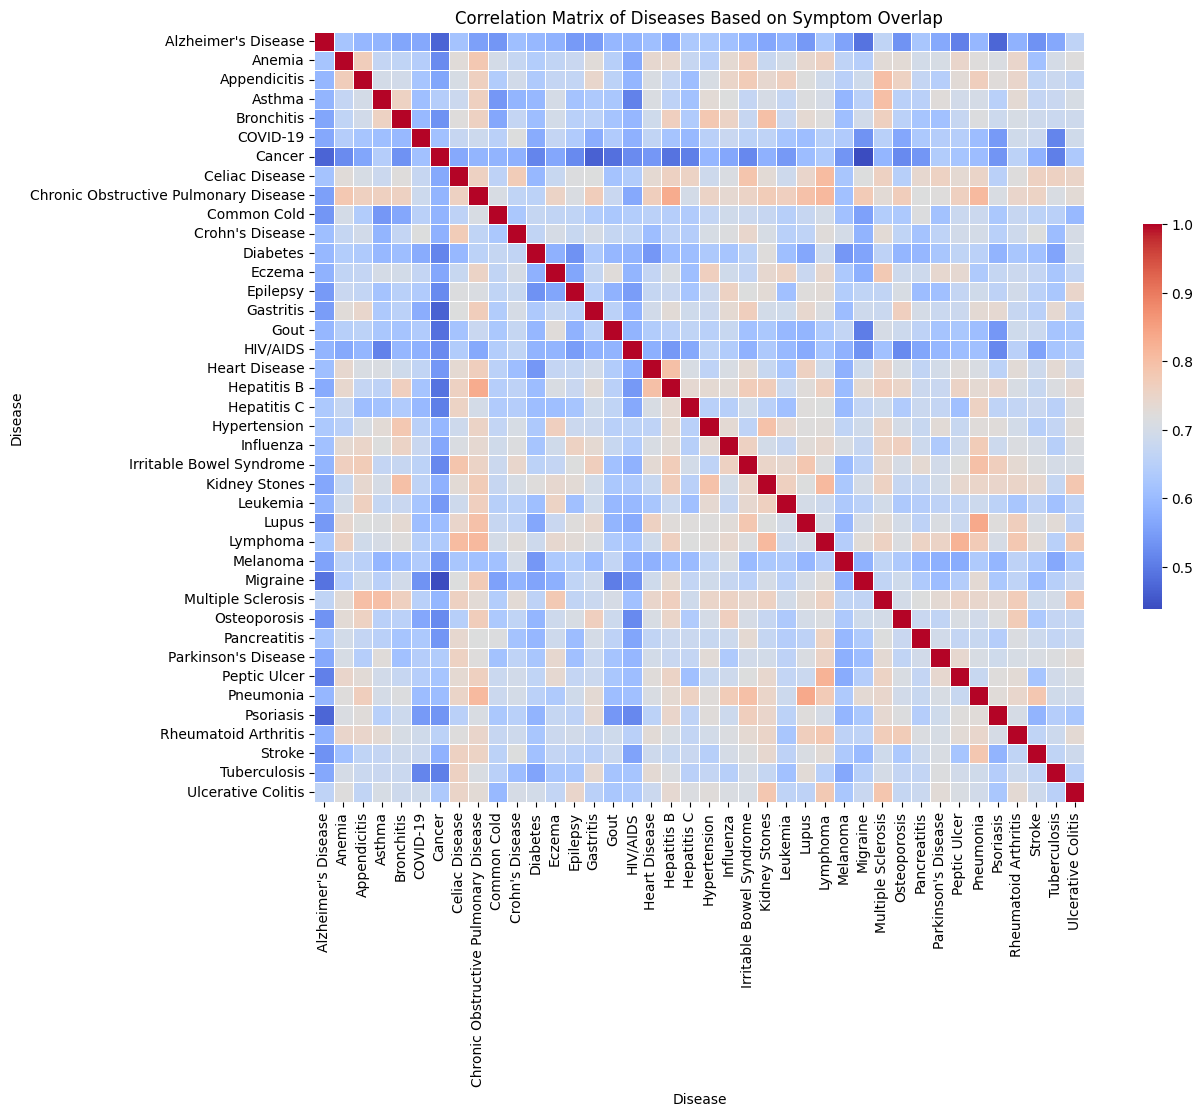

In [32]:
import seaborn as sns
import numpy as np
import pandas as pd
symptom_binary_matrix = pd.get_dummies(df.set_index('Disease').stack()).groupby(level=0).sum()

disease_correlation = symptom_binary_matrix.T.corr()

plt.figure(figsize=(15, 10))
sns.heatmap(
    disease_correlation,
    annot=False,  
    cmap='coolwarm',
    linewidths=0.5,
    square=True,
    cbar_kws={"shrink": .5}
)
plt.title("Correlation Matrix of Diseases Based on Symptom Overlap")
plt.show()


## Model Training and Evaluation



In [33]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [ ]:
symptom_columns = df.columns[1:]
onehot_encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
encoded_symptoms = onehot_encoder.fit_transform(df[symptom_columns])

encoded_df = pd.DataFrame(encoded_symptoms, columns=onehot_encoder.get_feature_names_out(symptom_columns))

preprocessed_df = pd.concat([df[['Disease']].reset_index(drop=True), encoded_df], axis=1)

preprocessed_df.head()

,Disease,Symptom_1_Aura,Symptom_1_Bleeding mole,Symptom_1_Blood in stool,Symptom_1_Bowel issues,Symptom_1_Burning,Symptom_1_Change in bowel habits,Symptom_1_Chest pain,Symptom_1_Difficulty sleeping,Symptom_1_Difficulty walking,...,Symptom_17_Pigment spread,Symptom_17_Shortness of breath,Symptom_17_Skin changes,Symptom_17_Sore that doesn’t heal,Symptom_17_Swollen lymph nodes,Symptom_17_Tenderness,Symptom_17_Thickened skin,Symptom_17_Tophi,Symptom_17_Vomiting,Symptom_17_Weakness
0,Heart Disease,-0.086929,-0.100504,3.132221,-0.217072,-0.100504,-0.070888,-0.050063,-0.112509,-0.050063,...,-0.050063,-0.432370,-0.050063,-0.468521,-0.100504,-0.050063,-0.217072,-0.070888,-0.050063,-0.050063
1,Rheumatoid Arthritis,-0.086929,-0.100504,-0.319262,-0.217072,-0.100504,-0.070888,-0.050063,-0.112509,-0.050063,...,-0.050063,2.312835,-0.050063,-0.468521,-0.100504,-0.050063,-0.217072,-0.070888,-0.050063,-0.050063
2,Bronchitis,-0.086929,-0.100504,-0.319262,4.606758,-0.100504,-0.070888,-0.050063,-0.112509,-0.050063,...,-0.050063,-0.432370,-0.050063,-0.468521,-0.100504,-0.050063,-0.217072,-0.070888,-0.050063,-0.050063
3,Gout,-0.086929,-0.100504,-0.319262,-0.217072,-0.100504,-0.070888,-0.050063,-0.112509,-0.050063,...,-0.050063,-0.432370,-0.050063,-0.468521,-0.100504,-0.050063,-0.217072,-0.070888,-0.050063,-0.050063
4,Bronchitis,-0.086929,-0.100504,-0.319262,-0.217072,-0.100504,-0.070888,-0.050063,-0.112509,-0.050063,...,-0.050063,-0.432370,-0.050063,2.134375,-0.100504,-0.050063,-0.217072,-0.070888,-0.050063,-0.050063


In [35]:
y = le.fit_transform(preprocessed_df[['Disease']])
X = preprocessed_df.drop('Disease', axis=1)

c:\Users\Nilanjan\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\preprocessing\_label.py:110: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [36]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

## MODEL TRAINING (Machine Learning)

In [37]:
import warnings
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from decimal import Decimal
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
import matplotlib.pyplot as plt

In [38]:
accuracy_list=[]
model_list=[]
cross_accuracy_list=[]

In [39]:
mnb = MultinomialNB()
mnb = mnb.fit(X, y)
# prediction of labels for the test data
mnb_pred = mnb.predict(X_test)
# calculation of accuracy score based on predictions performed
# converting to Decimal as rounding with float is inaccurate
acc_mnb = round((accuracy_score(y_test, mnb_pred) * 100), 2)
accuracy_list.append(acc_mnb)
model_list.append("MNB")
print(f"Accuracy (MNB) : {acc_mnb}%")

# Cross Validation Accuracy MNB
# performing cross validation with 5 different splits
scores_mnb = cross_val_score(mnb, X, y, cv=5)
# mean of cross val score (accuracy)
score = round(Decimal(scores_mnb.mean() * 100), 2)
cross_accuracy_list.append(score)
print(f"Cross Validation Accuracy (MNB): {score}%")

ValueError: Negative values in data passed to MultinomialNB (input X).

In [ ]:

# RF Classifier
rf = RandomForestClassifier(n_estimators=10, criterion='entropy')
rf = rf.fit(X, y)
# prediction of labels for the test data
rf_pred = rf.predict(X_test)
acc_rf = round(Decimal(accuracy_score(y_test, rf_pred) * 100), 2)
accuracy_list.append(acc_rf)
model_list.append("RF")
print(f"Accuracy (RF) : {acc_rf}%")

# Cross Validation Accuracy RF
# performing cross validation with 5 different splits
scores_rf = cross_val_score(rf, X, y, cv=5)
# mean of cross val score (accuracy)
score = round(Decimal(scores_rf.mean() * 100), 2)
cross_accuracy_list.append(score)
print(f"Cross Validation Accuracy (RF): {score}%")

Accuracy (RF) : 100.00%
Cross Validation Accuracy (RF): 5.00%


In [ ]:
# KNN Classifier
knn = KNeighborsClassifier(n_neighbors=7, weights='distance', n_jobs=4)
knn = knn.fit(X, y)
# prediction of labels for the test data
knn_pred = knn.predict(X_test)
acc_knn = round(Decimal(accuracy_score(y_test, knn_pred) * 100), 2)
accuracy_list.append(acc_knn)
model_list.append("KNN")
print(f"Accuracy (KNN) : {acc_knn}%")

# Cross Validation Accuracy KNN
# performing cross validation with 5 different splits
scores_knn = cross_val_score(knn, X, y, cv=5)
# mean of cross val score (accuracy)
score = round(Decimal(scores_knn.mean() * 100), 2)
cross_accuracy_list.append(score)
print(f"Cross Validation Accuracy (KNN): {score}%")

Accuracy (KNN) : 100.00%
Cross Validation Accuracy (KNN): 4.75%


In [ ]:
# LR Classifier
lr = LogisticRegression()
lr = lr.fit(X, y)
# prediction of labels for the test data
lr_pred = lr.predict(X_test)
acc_lr = round(Decimal(accuracy_score(y_test, lr_pred) * 100), 2)
accuracy_list.append(acc_lr)
model_list.append("LR")
print(f"Accuracy (LR) : {acc_lr}%")

# Cross Validation Accuracy LR
# performing cross validation with 5 different splits
scores_lr = cross_val_score(lr, X, y, cv=5)
# mean of cross val score (accuracy)
score = round(Decimal(scores_lr.mean() * 100), 2)
cross_accuracy_list.append(score)
print(f"Cross Validation Accuracy (LR): {score}%")

Accuracy (LR) : 100.00%
Cross Validation Accuracy (LR): 6.75%


In [ ]:
# SVM Classifier
svm = SVC()
svm = svm.fit(X, y)
# prediction of labels for the test data
svm_pred = svm.predict(X_test)
acc_svm = round(Decimal(accuracy_score(y_test, svm_pred) * 100), 2)
accuracy_list.append(acc_svm)
model_list.append("SVM")
print(f"Accuracy (SVM) : {acc_svm}%")

# Cross Validation Accuracy SVM
# performing cross validation with 5 different splits
scores_svm = cross_val_score(svm, X, y, cv=5)
# mean of cross val score (accuracy)
score = round(Decimal(scores_svm.mean() * 100), 2)
cross_accuracy_list.append(score)
print(f"Cross Validation Accuracy (SVM): {score}%")

Accuracy (SVM) : 98.75%
Cross Validation Accuracy (SVM): 4.00%


In [ ]:
# DT Classifier
dt = DecisionTreeClassifier()
dt = dt.fit(X, y)
# prediction of labels for the test data
dt_pred = dt.predict(X_test)
acc_dt = round(Decimal(accuracy_score(y_test, dt_pred) * 100), 2)
accuracy_list.append(acc_dt)
model_list.append("DT")
print(f"Accuracy (DT) : {acc_dt}%")

# Cross Validation Accuracy DT
# performing cross validation with 5 different splits
scores_dt = cross_val_score(dt, X, y, cv=5)
# mean of cross val score (accuracy)
score = round(Decimal(scores_dt.mean() * 100), 2)
cross_accuracy_list.append(score)
print(f"Cross Validation Accuracy (DT): {score}%")

Accuracy (DT) : 100.00%
Cross Validation Accuracy (DT): 4.25%


In [ ]:
# MLP Classifier
mlp = MLPClassifier(hidden_layer_sizes=(32, 32, 32), activation='relu', solver='adam', max_iter=50)
mlp = mlp.fit(X, y)
# prediction of labels for the test data
mlp_pred = mlp.predict(X_test)
acc_mlp = round(Decimal(accuracy_score(y_test, mlp_pred) * 100), 2)
accuracy_list.append(acc_mlp)
model_list.append("MLP")
print(f"Accuracy (MLP) : {acc_mlp}%")

# Cross Validation Accuracy MLP
# performing cross validation with 5 different splits
scores_mlp = cross_val_score(mlp, X, y, cv=5)
# mean of cross val score (accuracy)
score = round(Decimal(scores_mlp.mean() * 100), 2)
cross_accuracy_list.append(score)
print(f"Cross Validation Accuracy (MLP): {score}%")

c:\Users\Nilanjan\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\Nilanjan\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


Accuracy (MLP) : 92.50%


c:\Users\Nilanjan\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\Nilanjan\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\Nilanjan\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\Nilanjan\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the 

Cross Validation Accuracy (MLP): 4.00%


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping

# Load the dataset
data = pd.read_csv('resources/dataset_kaggle.csv')

# Convert the categorical target variable to numerical using label encoding
data['Disease'] = pd.factorize(data['Disease'])[0]
# Separate the features and target variable
X = data.iloc[:, 1:]
y = data.iloc[:, 0:1]

# Convert the features to one-hot encoding
X = pd.get_dummies(X)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the neural network architecture
model = Sequential()
model.add(Dense(128, input_dim=X.shape[1], activation='relu'))
model.add(Dropout(0.455))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.455))
model.add(Dense(np.max(y)+1, activation='softmax'))

# Compile the model
model.compile(loss='sparse_categorical_crossentropy', optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])

# Define early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=10)

# Train the model
history = model.fit(X_train, y_train,epochs=100, batch_size=32, verbose=1, callbacks=[early_stopping])

# Evaluate the model on the testing set
score = model.evaluate(X_test, y_test, verbose=1)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

c:\Users\Nilanjan\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.0235 - loss: 3.7313  
Epoch 2/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.0424 - loss: 3.6694 
Epoch 3/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.0600 - loss: 3.6377 
Epoch 4/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.0628 - loss: 3.6114 
Epoch 5/100
 1/10 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.0625 - loss: 3.5649

c:\Users\Nilanjan\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\src\callbacks\early_stopping.py:153: UserWarning: Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: accuracy,loss
  current = self.get_monitor_value(logs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.0808 - loss: 3.5670 
Epoch 6/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.0844 - loss: 3.5243 
Epoch 7/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1332 - loss: 3.4760 
Epoch 8/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1333 - loss: 3.4393 
Epoch 9/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2284 - loss: 3.3143 
Epoch 10/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2084 - loss: 3.2877 
Epoch 11/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1761 - loss: 3.2895 
Epoch 12/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2447 - loss: 3.1779 
Epoch 13/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2526 - loss: 3.0614 
Epoch 14/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3384 - loss: 2.9188 
Epoch 15/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3309 - loss: 2.8766 
Epoch 16/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accura

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


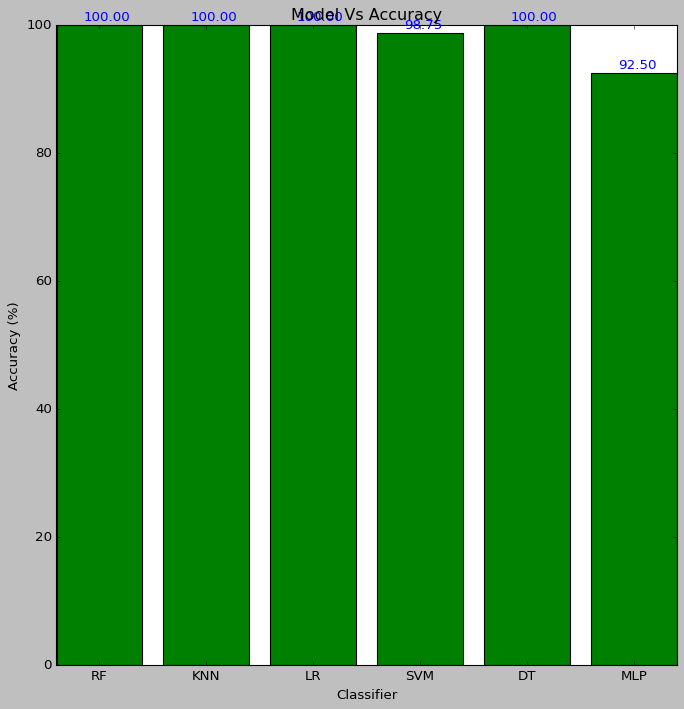

In [ ]:
import matplotlib.pyplot as plt
print(plt.style.available)  # Check available styles
plt.style.use('classic')  # Use a valid style
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot()
plt.title("Model Vs Accuracy")
plt.xlabel('Classifier')
plt.ylabel('Accuracy (%)')
plt.bar(model_list, accuracy_list, color='green')
for i, j in enumerate(accuracy_list):
    ax.text(float(i)-0.15, float(j)+0.7, str(j), color='blue')
plt.show()

## Model Selection and Training

### Multi-Layer Perceptron (MLP)


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import tensorflow as tf

In [ ]:
onehot_encoder = OneHotEncoder(sparse_output=False)
mlp_model = Sequential([
    tf.keras.layers.Input(shape=(preprocessed_df.shape[1] - 1,)),  
    Dense(128, activation='relu'), 
    Dense(64, activation='relu'),  
    Dense(y.shape[1], activation='softmax') 
])

mlp_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
mlp_history = mlp_model.fit(X_train, y_train, epochs=20, validation_split=0.2, batch_size=32)

mlp_history.history

Epoch 1/20


c:\Users\Nilanjan\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\src\ops\nn.py:907: UserWarning: You are using a softmax over axis -1 of a tensor of shape (32, 1). This axis has size 1. The softmax operation will always return the value 1, which is likely not what you intended. Did you mean to use a sigmoid instead?
  warnings.warn(
c:\Users\Nilanjan\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\src\losses\losses.py:33: SyntaxWarning: In loss categorical_crossentropy, expected y_pred.shape to be (batch_size, num_classes) with num_classes > 1. Received: y_pred.shape=(32, 1). Consider using 'binary_crossentropy' if you only have 2 classes.
  return self.fn(y_true, y_pred, **self._fn_kwargs)


8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.0064 - loss: 0.0000e+00 - val_accuracy: 0.0469 - val_loss: 0.0000e+00
Epoch 2/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.0044 - loss: 0.0000e+00 - val_accuracy: 0.0469 - val_loss: 0.0000e+00
Epoch 3/20


c:\Users\Nilanjan\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\src\ops\nn.py:907: UserWarning: You are using a softmax over axis -1 of a tensor of shape (32, 1). This axis has size 1. The softmax operation will always return the value 1, which is likely not what you intended. Did you mean to use a sigmoid instead?
  warnings.warn(
c:\Users\Nilanjan\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\src\losses\losses.py:33: SyntaxWarning: In loss categorical_crossentropy, expected y_pred.shape to be (batch_size, num_classes) with num_classes > 1. Received: y_pred.shape=(32, 1). Consider using 'binary_crossentropy' if you only have 2 classes.
  return self.fn(y_true, y_pred, **self._fn_kwargs)


8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.0134 - loss: 0.0000e+00 - val_accuracy: 0.0469 - val_loss: 0.0000e+00
Epoch 4/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.0154 - loss: 0.0000e+00 - val_accuracy: 0.0469 - val_loss: 0.0000e+00
Epoch 5/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.0084 - loss: 0.0000e+00 - val_accuracy: 0.0469 - val_loss: 0.0000e+00
Epoch 6/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.0116 - loss: 0.0000e+00 - val_accuracy: 0.0469 - val_loss: 0.0000e+00
Epoch 7/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.0107 - loss: 0.0000e+00 - val_accuracy: 0.0469 - val_loss: 0.0000e+00
Epoch 8/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.0142 - loss: 0.0000e+00 - val_accuracy: 0.0469 - val_loss: 0.0000e+00
Epoch 9/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.0069 - loss: 0.0000e+00 - val_accuracy: 0.0469 - val_loss: 0.0000e+00
Epoch 10/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.0079 - loss: 0.0000e+00

{'accuracy': [0.01171875,
  0.01171875,
  0.01171875,
  0.01171875,
  0.01171875,
  0.01171875,
  0.01171875,
  0.01171875,
  0.01171875,
  0.01171875,
  0.01171875,
  0.01171875,
  0.01171875,
  0.01171875,
  0.01171875,
  0.01171875,
  0.01171875,
  0.01171875,
  0.01171875,
  0.01171875],
 'loss': [0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0],
 'val_accuracy': [0.046875,
  0.046875,
  0.046875,
  0.046875,
  0.046875,
  0.046875,
  0.046875,
  0.046875,
  0.046875,
  0.046875,
  0.046875,
  0.046875,
  0.046875,
  0.046875,
  0.046875,
  0.046875,
  0.046875,
  0.046875,
  0.046875,
  0.046875],
 'val_loss': [0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0]}

In [ ]:
test_loss, test_accuracy = mlp_model.evaluate(X_test, y_test)

print(f"Test Accuracy: {test_accuracy}")
print(f"Test Loss: {test_loss}")

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.0484 - loss: 0.0000e+00  
Test Accuracy: 0.05000000074505806
Test Loss: 0.0


c:\Users\Nilanjan\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\src\ops\nn.py:907: UserWarning: You are using a softmax over axis -1 of a tensor of shape (None, 1). This axis has size 1. The softmax operation will always return the value 1, which is likely not what you intended. Did you mean to use a sigmoid instead?
  warnings.warn(
c:\Users\Nilanjan\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\src\losses\losses.py:33: SyntaxWarning: In loss categorical_crossentropy, expected y_pred.shape to be (batch_size, num_classes) with num_classes > 1. Received: y_pred.shape=(None, 1). Consider using 'binary_crossentropy' if you only have 2 classes.
  return self.fn(y_true, y_pred, **self._fn_kwargs)


## Convolutional Neural Network (CNN) for Text Model Summary

In [ ]:
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten

In [ ]:
cnn_model = Sequential([
    tf.keras.layers.Input(shape=(preprocessed_df.shape[1] - 1, 1)), 
    Conv1D(64, kernel_size=3, activation='relu'),  
    MaxPooling1D(pool_size=2), 
    Flatten(),  
    Dense(128, activation='relu'),  
    Dense(64, activation='relu'),  
    Dense(y.shape[1], activation='softmax')  
])

cnn_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
X_cnn = X_train.values.reshape(X_train.shape[0], X_train.shape[1], 1)
cnn_history = cnn_model.fit(X_cnn, y, epochs=20, validation_split=0.2, batch_size=32)

cnn_history.history

Epoch 1/20


c:\Users\Nilanjan\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\src\ops\nn.py:907: UserWarning: You are using a softmax over axis -1 of a tensor of shape (32, 1). This axis has size 1. The softmax operation will always return the value 1, which is likely not what you intended. Did you mean to use a sigmoid instead?
  warnings.warn(
c:\Users\Nilanjan\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\src\losses\losses.py:33: SyntaxWarning: In loss categorical_crossentropy, expected y_pred.shape to be (batch_size, num_classes) with num_classes > 1. Received: y_pred.shape=(32, 1). Consider using 'binary_crossentropy' if you only have 2 classes.
  return self.fn(y_true, y_pred, **self._fn_kwargs)


8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 72ms/step - accuracy: 0.0109 - loss: 0.0000e+00 - val_accuracy: 0.0312 - val_loss: 0.0000e+00
Epoch 2/20
1/8 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step - accuracy: 0.0312 - loss: 0.0000e+00

c:\Users\Nilanjan\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\src\ops\nn.py:907: UserWarning: You are using a softmax over axis -1 of a tensor of shape (32, 1). This axis has size 1. The softmax operation will always return the value 1, which is likely not what you intended. Did you mean to use a sigmoid instead?
  warnings.warn(
c:\Users\Nilanjan\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\src\losses\losses.py:33: SyntaxWarning: In loss categorical_crossentropy, expected y_pred.shape to be (batch_size, num_classes) with num_classes > 1. Received: y_pred.shape=(32, 1). Consider using 'binary_crossentropy' if you only have 2 classes.
  return self.fn(y_true, y_pred, **self._fn_kwargs)


8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - accuracy: 0.0256 - loss: 0.0000e+00 - val_accuracy: 0.0312 - val_loss: 0.0000e+00
Epoch 3/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - accuracy: 0.0168 - loss: 0.0000e+00 - val_accuracy: 0.0312 - val_loss: 0.0000e+00
Epoch 4/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - accuracy: 0.0163 - loss: 0.0000e+00 - val_accuracy: 0.0312 - val_loss: 0.0000e+00
Epoch 5/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - accuracy: 0.0145 - loss: 0.0000e+00 - val_accuracy: 0.0312 - val_loss: 0.0000e+00
Epoch 6/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - accuracy: 0.0188 - loss: 0.0000e+00 - val_accuracy: 0.0312 - val_loss: 0.0000e+00
Epoch 7/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - accuracy: 0.0143 - loss: 0.0000e+00 - val_accuracy: 0.0312 - val_loss: 0.0000e+00
Epoch 8/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - accuracy: 0.0263 - loss: 0.0000e+00 - val_accuracy: 0.0312 - val_loss: 0.0000e+00
Epoch 9/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - accuracy: 0.0182 - loss: 0.00

{'accuracy': [0.015625,
  0.015625,
  0.015625,
  0.015625,
  0.015625,
  0.015625,
  0.015625,
  0.015625,
  0.015625,
  0.015625,
  0.015625,
  0.015625,
  0.015625,
  0.015625,
  0.015625,
  0.015625,
  0.015625,
  0.015625,
  0.015625,
  0.015625],
 'loss': [0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0],
 'val_accuracy': [0.03125,
  0.03125,
  0.03125,
  0.03125,
  0.03125,
  0.03125,
  0.03125,
  0.03125,
  0.03125,
  0.03125,
  0.03125,
  0.03125,
  0.03125,
  0.03125,
  0.03125,
  0.03125,
  0.03125,
  0.03125,
  0.03125,
  0.03125],
 'val_loss': [0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0]}

In [ ]:
X_cnn = X_test.values.reshape(X_test.shape[0], X_test.shape[1], 1)
test_loss_cnn, test_accuracy_cnn = cnn_model.evaluate(X_cnn, y_test)
print(f"Test Accuracy: {test_accuracy_cnn}")
print(f"Test Loss: {test_loss_cnn}")

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.0484 - loss: 0.0000e+00 
Test Accuracy: 0.05000000074505806
Test Loss: 0.0


c:\Users\Nilanjan\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\src\ops\nn.py:907: UserWarning: You are using a softmax over axis -1 of a tensor of shape (None, 1). This axis has size 1. The softmax operation will always return the value 1, which is likely not what you intended. Did you mean to use a sigmoid instead?
  warnings.warn(
c:\Users\Nilanjan\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\src\losses\losses.py:33: SyntaxWarning: In loss categorical_crossentropy, expected y_pred.shape to be (batch_size, num_classes) with num_classes > 1. Received: y_pred.shape=(None, 1). Consider using 'binary_crossentropy' if you only have 2 classes.
  return self.fn(y_true, y_pred, **self._fn_kwargs)


## Recurrent Neural Network (RNN) with LSTM Units Model Summary

In [ ]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import LSTM
from tensorflow.keras import backend as K

In [ ]:
def create_lstm_model():
    model = Sequential([
        tf.keras.layers.Input(shape=(preprocessed_df.shape[1] - 1, 1)),  
        LSTM(128, activation='relu', return_sequences=True),  
        LSTM(64, activation='relu'),  
        Dense(64, activation='relu'), 
        Dense(y.shape[1], activation='softmax')  
    ])
    return model

lstm_model = create_lstm_model()
optimizer = Adam(learning_rate=0.0001, clipvalue=1.0)  
lstm_model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
X_lstm = X_train.values.reshape(X_train.shape[0], X_train.shape[1], 1)
lstm_history = lstm_model.fit(X_lstm, y_train, epochs=20, validation_split=0.2, batch_size=32)
test_loss_lstm, test_accuracy_lstm = lstm_model.evaluate(X_lstm, y_train)
print(f"Test Accuracy: {test_accuracy_lstm}")
print(f"Test Loss: {test_loss_lstm}")

Epoch 1/20


c:\Users\Nilanjan\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\src\ops\nn.py:907: UserWarning: You are using a softmax over axis -1 of a tensor of shape (32, 1). This axis has size 1. The softmax operation will always return the value 1, which is likely not what you intended. Did you mean to use a sigmoid instead?
  warnings.warn(
c:\Users\Nilanjan\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\src\losses\losses.py:33: SyntaxWarning: In loss categorical_crossentropy, expected y_pred.shape to be (batch_size, num_classes) with num_classes > 1. Received: y_pred.shape=(32, 1). Consider using 'binary_crossentropy' if you only have 2 classes.
  return self.fn(y_true, y_pred, **self._fn_kwargs)


8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 402ms/step - accuracy: 0.0093 - loss: 0.0000e+00

c:\Users\Nilanjan\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\src\ops\nn.py:907: UserWarning: You are using a softmax over axis -1 of a tensor of shape (32, 1). This axis has size 1. The softmax operation will always return the value 1, which is likely not what you intended. Did you mean to use a sigmoid instead?
  warnings.warn(
c:\Users\Nilanjan\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\src\losses\losses.py:33: SyntaxWarning: In loss categorical_crossentropy, expected y_pred.shape to be (batch_size, num_classes) with num_classes > 1. Received: y_pred.shape=(32, 1). Consider using 'binary_crossentropy' if you only have 2 classes.
  return self.fn(y_true, y_pred, **self._fn_kwargs)


8/8 ━━━━━━━━━━━━━━━━━━━━ 6s 476ms/step - accuracy: 0.0095 - loss: 0.0000e+00 - val_accuracy: 0.0469 - val_loss: 0.0000e+00
Epoch 2/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 3s 356ms/step - accuracy: 0.0092 - loss: 0.0000e+00 - val_accuracy: 0.0469 - val_loss: 0.0000e+00
Epoch 3/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 3s 334ms/step - accuracy: 0.0175 - loss: 0.0000e+00 - val_accuracy: 0.0469 - val_loss: 0.0000e+00
Epoch 4/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 3s 351ms/step - accuracy: 0.0121 - loss: 0.0000e+00 - val_accuracy: 0.0469 - val_loss: 0.0000e+00
Epoch 5/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 3s 337ms/step - accuracy: 0.0121 - loss: 0.0000e+00 - val_accuracy: 0.0469 - val_loss: 0.0000e+00
Epoch 6/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 3s 329ms/step - accuracy: 0.0074 - loss: 0.0000e+00 - val_accuracy: 0.0469 - val_loss: 0.0000e+00
Epoch 7/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 3s 331ms/step - accuracy: 0.0154 - loss: 0.0000e+00 - val_accuracy: 0.0469 - val_loss: 0.0000e+00
Epoch 8/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 3s 339ms/step - accuracy: 0.0049 - lo

In [ ]:
X_lstm = X_test.values.reshape(X_test.shape[0], X_test.shape[1], 1)
test_loss_lstm, test_accuracy_lstm = lstm_model.evaluate(X_lstm, y_test)
print(f"Test Accuracy: {test_accuracy_lstm}")
print(f"Test Loss: {test_loss_lstm}")

c:\Users\Nilanjan\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\src\ops\nn.py:907: UserWarning: You are using a softmax over axis -1 of a tensor of shape (None, 1). This axis has size 1. The softmax operation will always return the value 1, which is likely not what you intended. Did you mean to use a sigmoid instead?
  warnings.warn(
c:\Users\Nilanjan\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\src\losses\losses.py:33: SyntaxWarning: In loss categorical_crossentropy, expected y_pred.shape to be (batch_size, num_classes) with num_classes > 1. Received: y_pred.shape=(None, 1). Consider using 'binary_crossentropy' if you only have 2 classes.
  return self.fn(y_true, y_pred, **self._fn_kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 105ms/step - accuracy: 0.0484 - loss: 0.0000e+00
Test Accuracy: 0.05000000074505806
Test Loss: 0.0


## Saving the MLP Model

In [ ]:
import pickle

# Save the model
with open('resources/mlp_model.pkl', 'wb') as file:
    pickle.dump(mnb, file)

print("MNB model loaded successfully!")


MNB model loaded successfully!


In [ ]:
mlp_model.save('resources/mlp_model.h5')
print("MLP model saved successfully in the 'resources' folder.")

MLP model saved successfully in the 'resources' folder.


In [ ]:
import pandas as pd
df = pd.read_csv('resources/dataset_kaggle.csv')
symptom_columns = df.columns[1:]  
unique_symptoms = set()

for col in symptom_columns:
    unique_symptoms.update(df[col].unique())
unique_symptoms.discard(0)
symptoms_list = sorted(unique_symptoms)
symptoms_list

['Anemia',
 'Anxiety',
 'Aura',
 'Belching',
 'Bladder issues',
 'Bleeding mole',
 'Blisters',
 'Bloating',
 'Blood in stool',
 'Body aches',
 'Bone fractures',
 'Bone pain',
 'Bowel issues',
 'Burning',
 'Butterfly-shaped rash',
 'Change in bowel habits',
 'Change in existing mole',
 'Chest discomfort',
 'Chest pain',
 'Congestion',
 'Constipation',
 'Coughing up blood',
 'Depression',
 'Diarrhea',
 'Difficulty performing familiar tasks',
 'Difficulty sleeping',
 'Difficulty swallowing',
 'Difficulty thinking',
 'Difficulty walking',
 'Double vision',
 'Easy bruising',
 'Fatigue',
 'Fear',
 'Frequent infections',
 'Frequent urination',
 'Fullness',
 'Gas',
 'Hair loss',
 'Hard lumps',
 'Headache',
 'Hunger',
 'Inability to defecate',
 'Increased mucus production',
 'Increased thirst',
 'Irregular heartbeat',
 'Irritability',
 'Itching',
 'Jaw pain',
 'Limited range of motion',
 'Loss of automatic movements',
 'Loss of height',
 'Loss of smell',
 'Loss of taste',
 'Lump or swelling',
 